---

# Integrated Project #2. A/A/B Testing

Valeriya Vazhnova

## Introduction

This project has two main goals:
- to explore customer behavior in an online food store;
- to assess the results of A/A/B testing.

First, we're going to create the event funnel, calculate share of customers that reach the purchase stage and establish sequence of their steps.

And second, we are going to test our hypothesis that using new fonts in our app could influence customer behavior and increase sales. Since we have two control groups with the old fonts (246 and 247), we'll be able to make sure that splitting was done correctly and the testing is organized well. 

## <a id='cont'>Table of Contents</a>

[*Importing Libraries*](#libraries)

**Step 1.** [Importing the Data](#step1)

**Step 2.** [Preparing the Data for Analysis](#step2)

- [Renaming the Columns](#step2rename)
- [Checking for the Right Data Types](#step2types)
- [Adding a Separate Column for Dates](#step2date)
- [Exploring the Data](#step2exploring)
- [Checking for Duplicates](#step2duplicates)
- [Users and Groups Check](#step2users)
- [Checking User Activity](#step2activity)

[*Conclusions to Step 2*](#step2concl)

**Step 3.** [Thoroughly Studying the Data](#step3)
- [How Many Events Are in the Logs?](#step3events)
- [How Many Users Are in the Logs?](#step3users)
- [What's the Average Number of Events per User?](#step3eventsperuser)
- [What Period of Time Does the Data Cover?](#step3period)
- [How Many Events and Users Were Lost After Excluding the Older Data?](#step3lost)

[*Conclusions to Step 3*](#step3concl)

**Step 4.** [Studying the Event Funnel](#step4)

- [What Events Are in the Logs? What Is their Frequency of Occurrence?](#step4events)
- [How Many Users Performed Each of These Actions?](#step4users)
- [In What Order Did the Actions Take Place?](#step4order)
- [What Is the Share of Users That Proceed from Each Stage to the Next?](#step4share)
- [What Share of Users Made the Entire Journey from Their First Event to Payment?](#step4entirejourney)

[*Conclusions to Step 4*](#step4concl)

**Step 5.** [Studying the Results of the Experiment](#step5)

- [How Many Users are There in Each Group?](#step5users)
- [Is There a Statistically Significant Difference Between Samples 246 and 247?](#step5aa)
- [Is There Statistically Significant Difference Between Control Groups and the Group with Altered Fonts?](#step5ab)
- [What Should the Significance Level Be?](#step5alpha)

[*Conclusions to Step 5*](#step5concl)

[**General Conclusions**](#genconcl)

### <a id='libraries'>Importing Libraries</a>

These are the libraries we're going to use in our project. Among them are libraries for working with rectangular data (pandas), datetime type of data, performing mathematical calculations (math), applying statistics formulas (stats) and plotting graphs (plotly).

In [1]:
# Working with data
import pandas as pd
import math as mth
from datetime import datetime
from scipy import stats as st
import numpy as np

# Plotting graphs

import plotly.express as px
import plotly.graph_objects as go

# Dealing with warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

## <a id='step1'>Step 1. Importing the Data</a>

In [2]:
try:
    df = pd.read_csv('/Users/lera/Documents/Personal/_Yandex practicum/4_studies/sprint10_integrated project 2/logs_exp_us.csv',
                  sep='\t')
except:
    df = pd.read_csv('/datasets/logs_exp_us.csv',
                  sep='\t')
df.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


We've imported the data and assessed it visually. During the next step we'll do the data preprocessing and exploratoty data analysis.

[Back to Contents](#cont)

## <a id='step2'>Step 2. Preparing the Data for Analysis</a>

### <a id='step2rename'>Renaming the Columns</a>

First, we are going to rename the columns. This action is not really necessary, but makes working with data more convenient. Also, new names are shorter and better reflect the content of the columns.

In [4]:
df.columns = ['event_name', 'user_id', 'event_ts', 'group']
df.head()

,event_name,user_id,event_ts,group
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


[Back to Contents](#cont)

### <a id='step2types'>Checking for the Right Data Types</a>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   event_name  244126 non-null  object
 1   user_id     244126 non-null  int64 
 2   event_ts    244126 non-null  int64 
 3   group       244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


Technically speaking, event_name is a category, but we can leave it as an object too. What we really need to change is the column event_ts which gives us a timestamp (in seconds) as integer, but in order for us to be able to use it, we need to see the date and time in a readable format.

In [6]:
df.event_ts = pd.to_datetime(df.event_ts, unit='s')
df.head()

,event_name,user_id,event_ts,group
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248


[Back to Contents](#cont)

### <a id='step2date'>Adding a Separate Column for Dates</a>

We are also going to add a separate column for dates only.

In [7]:
df['date'] = df['event_ts'].dt.date
df.date = pd.to_datetime(df.date)
df.head()

,event_name,user_id,event_ts,group,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


[Back to Contents](#cont)

### <a id='step2exploring'>Exploring the Data</a>

Now we'll take a quick look at the contents of all the columns in order to get a general impression of the data and to spot any anomalies.

In [8]:
# Values in event_name

df.event_name.value_counts()

MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: event_name, dtype: int64

In [9]:
print('Number of entries: {}'.format(len(df)))

Number of entries: 244126


In [10]:
print('Number of unique users: {}'.format(df.user_id.nunique()))

Number of unique users: 7551


In [11]:
# Values in group column

df.group.value_counts()

248    85747
246    80304
247    78075
Name: group, dtype: int64

In [12]:
# Checking for missing values

df.isnull().sum()

event_name    0
user_id       0
event_ts      0
group         0
date          0
dtype: int64

In [13]:
df.describe(include='all')

,event_name,user_id,event_ts,group,date
count,244126,2.441260e+05,244126,244126.000000,244126
unique,5,NaN,176654,NaN,14
top,MainScreenAppear,NaN,2019-08-04 16:23:19,NaN,2019-08-01 00:00:00
freq,119205,NaN,9,NaN,36229
first,NaN,NaN,2019-07-25 04:43:36,NaN,2019-07-25 00:00:00
last,NaN,NaN,2019-08-07 21:15:17,NaN,2019-08-07 00:00:00
mean,NaN,4.627568e+18,NaN,247.022296,NaN
std,NaN,2.642425e+18,NaN,0.824434,NaN
min,NaN,6.888747e+15,NaN,246.000000,NaN
25%,NaN,2.372212e+18,NaN,246.000000,NaN


We can conclude that our dataset has 244,126 entries and includes information on 7,551 unique users.
Only 176,654 timestamps are unique. Some of these might be duplicates, though with such a big number of users it is possible that their actions just coincided in time.

In general, is dataset contains information on 15 days (from 25 July to 8 August 2019). We have five different event names and three different groups.

So far we haven't found any missing values.

[Back to Contents](#cont)

### <a id='step2duplicates'>Checking for Duplicates</a>

In [14]:
df.duplicated().sum()

413

Unfortunately, we do have duplicates in this dataset, which is not so good for the A/B testing.

In [15]:
# A sample of duplicated data

df[df.duplicated()].sample(5)

,event_name,user_id,event_ts,group,date
137444,PaymentScreenSuccessful,1602535389316247105,2019-08-04 18:55:39,248,2019-08-04
187564,MainScreenAppear,2611142795743063052,2019-08-06 09:24:59,246,2019-08-06
35233,CartScreenAppear,7738058666231999878,2019-08-01 19:06:35,246,2019-08-01
168991,PaymentScreenSuccessful,6932517045703054087,2019-08-05 17:00:03,248,2019-08-05
75115,PaymentScreenSuccessful,1754140665440434215,2019-08-03 02:22:20,247,2019-08-03


We'll try to establish if duplicates happened during some particular day or days.

If yes, we could discard the data on these days and lengthen our test to gather new information.

In [16]:
df[df.duplicated()]['date'].unique()

array(['2019-07-30T00:00:00.000000000', '2019-07-31T00:00:00.000000000',
       '2019-08-01T00:00:00.000000000', '2019-08-02T00:00:00.000000000',
       '2019-08-03T00:00:00.000000000', '2019-08-04T00:00:00.000000000',
       '2019-08-05T00:00:00.000000000', '2019-08-06T00:00:00.000000000',
       '2019-08-07T00:00:00.000000000'], dtype='datetime64[ns]')

However, we see that our data is duplicated during the second week, which is half of the test time.

It means, it's too late to improve the test itself, so we'll have to clean out the duplicates from our dataset.

In [17]:
df_clean = df.drop_duplicates(keep='last')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  243713 non-null  object        
 1   user_id     243713 non-null  int64         
 2   event_ts    243713 non-null  datetime64[ns]
 3   group       243713 non-null  int64         
 4   date        243713 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 11.2+ MB


We've deleted 413 duplicates. The last thing left to do is to check if every user belongs to one group only.

[Back to Contents](#cont)

### <a id='step2users'>Users and Groups Check</a>

In [18]:
# Checking the number of groups our users belong to

user_check = (df_clean
              .groupby('user_id')['group']
              .nunique()
              .reset_index()
              .sort_values(by='group', ascending=False))
user_check.group.describe()

count    7551.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: group, dtype: float64

Luckily, the splitting instument works fine and we have no users that were assigned to multiple groups by mistake. 

[Back to Contents](#cont)

### <a id='step2activity'>Checking User Activity</a>

Another thing we can check is if there was any suspicious user activity, e.g. users with too many actions.

In [19]:
# Calculating number of actions per user

user_activity = (df_clean
                 .groupby('user_id')['event_ts']
                 .nunique()
                 .reset_index()
                 .sort_values(by='event_ts', ascending=False))
user_activity.columns = ['user_id', 'n_actions']
user_activity.head()

,user_id,n_actions
5116,6304868067479728361,2242
147,197027893265565660,1730
3714,4623191541214045580,1592
5590,6932517045703054087,1295
1391,1754140665440434215,981


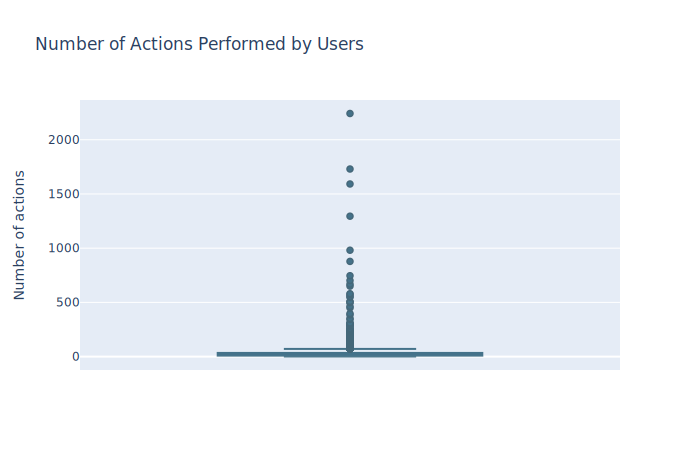

In [20]:
user_activity_graph = px.box(user_activity, y='n_actions',
                            labels=dict(n_actions='Number of actions'),
                            title='Number of Actions Performed by Users')
user_activity_graph.update_traces(marker_color='#003f5c', opacity=0.7, marker_line_color='#002f45', marker_line_width=1.5)
user_activity_graph.show('svg')

As we see from this boxplot, in terms of their activity some users definitely stand out.

In [21]:
max_actions = user_activity.n_actions.max()
print('One user performed {} actions, which means approximately {:.2f} actions per day.'.format(max_actions, max_actions/df_clean.date.nunique()))
print("It means checking the app once in every {:} minutes for 12 hours every single day.".format(round(60/(max_actions/df_clean.date.nunique()/12))))

One user performed 2242 actions, which means approximately 160.14 actions per day.
It means checking the app once in every 4 minutes for 12 hours every single day.


For a store that sells food this is a lot of actions. And while we can privately suspect this user of having OCD, we also need to define data anomalies, so that they wouldn't skew our results.

In [22]:
print('90th percentile: {}'.format(np.percentile(user_activity.n_actions, 90)))
print('95th percentile: {}'.format(np.percentile(user_activity.n_actions, 95)))
print('99th percentile: {}'.format(np.percentile(user_activity.n_actions, 99)))

90th percentile: 58.0
95th percentile: 81.0
99th percentile: 177.0


Since we're trying to preserve most of our data, we'll keep everything up to the 99th percentile. Only more than 177 actions per user will be considered an oultier.

In [23]:
# Creating a list of users which performed too many actions

too_many_actions = user_activity[user_activity.n_actions > 177]['user_id'].to_list()
len(too_many_actions)

76

In [24]:
# Creating a clean dataset whithout those users

data = df_clean[np.logical_not(df_clean.user_id.isin(too_many_actions))]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209736 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  209736 non-null  object        
 1   user_id     209736 non-null  int64         
 2   event_ts    209736 non-null  datetime64[ns]
 3   group       209736 non-null  int64         
 4   date        209736 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 9.6+ MB


[Back to Contents](#cont)

### <a id='step2concl'>Conclusions to Step 2</a>

We've downloaded and explored the dataset, renamed its columns, converted timestamps (in seconds) to datetime type and created a separate column with dates only. We've also removed the outliers (users with too high activity) and duplicated rows.

[Back to Contents](#cont)

## <a id='step3'>Step 3. Thoroughly Studying the Data</a>

During this step, we are going to answer the following questions:

- How many events are in the logs?
- How many users are in the logs?
- What's the average number of events per user?
- What period of time does the data cover? What period does the data actually represent?
- Did we lose many events and users when excluding the older data?
- Do we have users from all three experimental groups?

### <a id='step3events'>How Many Events Are in the Logs?</a>

In [25]:
print('Total number of events in our logs: {}'.format(len(data)))

Total number of events in our logs: 209736


In [26]:
print('They belong to {} different types.'.format(data.event_name.nunique()))

They belong to 5 different types.


In [27]:
print('Types of events:')
for i in data.event_name.unique().tolist():
    print('-', i)

Types of events:
- MainScreenAppear
- PaymentScreenSuccessful
- CartScreenAppear
- OffersScreenAppear
- Tutorial


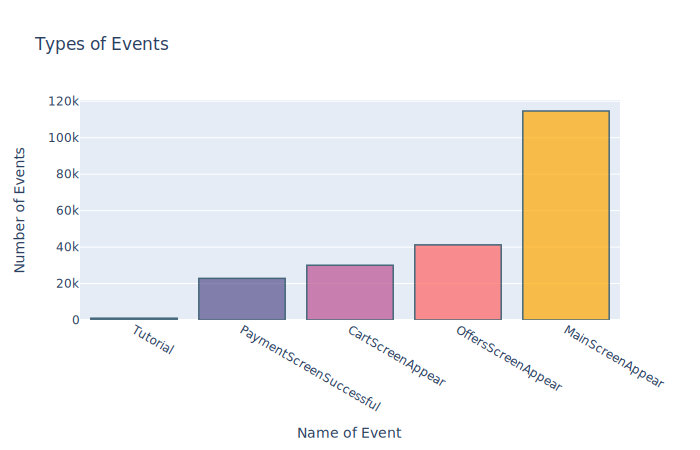

In [28]:
events = data.groupby('event_name')['event_ts'].count().reset_index().sort_values(by='event_ts')

colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']
events_graph = go.Figure()
events_graph.add_trace(go.Bar(x=events.event_name, y=events.event_ts, marker_color=colors,
                             opacity=0.7, marker_line_color='#002f45',
                              marker_line_width=1.5))
events_graph.update_layout(title='Types of Events',
                          xaxis_title='Name of Event',
                          yaxis_title='Number of Events')
events_graph.show('svg')

[Back to Contents](#cont)

### <a id='step3users'>How Many Users Are in the Logs?</a>

In [29]:
data['user_id'].nunique()

7475

After we've dropped the duplicated entries and filtered out the anomalies (users with too high level of activity), we're left with 7,475 users in our dataset.

[Back to Contents](#cont)

### <a id='step3eventsperuser'>What's the Average Number of Events per User?</a>

In [30]:
print('Average number of events per user: {}'.format(round(data.groupby('user_id')['event_name'].count().mean())))

Average number of events per user: 28


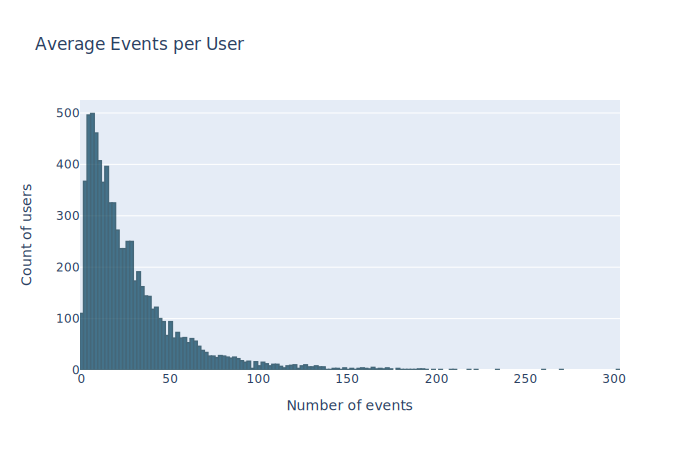

In [31]:
avg_events_graph = go.Figure()
avg_events_graph.add_trace(go.Histogram(x=data.groupby('user_id')['event_name'].count(),
                                       marker_color='#003f5c', opacity=0.7,
                                        marker_line_color='#002f45', marker_line_width=1.5))
avg_events_graph.update_layout(title='Average Events per User',
                              xaxis_title='Number of events',
                              yaxis_title='Count of users')
avg_events_graph.show('svg')

On average, each user performed 28 events. The distribution of this parameter is skewed to the right, meaning that the majority of users performed 0-50 actions, however there are people who performed 100, 150, 200 actions and more.

We should also remind you that we've already removed outliers (i.e. users with suspiciously big number of actions) during one of the the previous stages.

[Back to Contents](#cont)

### <a id='step3period'>What Period of Time Does the Data Cover?</a> 

In [32]:
print('Maximum date: {:}'.format(data.date.max()))
print('Minimum date: {:}'.format(data.date.min()))

Maximum date: 2019-08-07 00:00:00
Minimum date: 2019-07-25 00:00:00


From the first sight it seems that our dataset contains information on a two-week period: from 25 July to 8 August 2019.

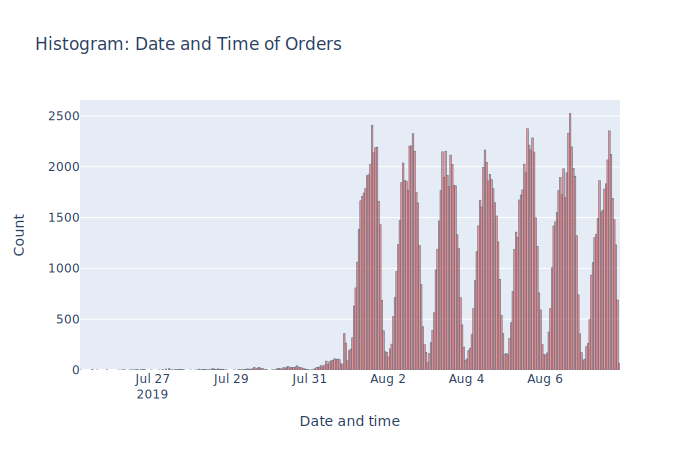

In [33]:
date_time = go.Figure(go.Histogram(x=data.event_ts, marker_color='#ff6361',
                                  marker_line_color='#002f45', marker_line_width=0.5,
                                  opacity=0.7))
date_time.update_layout(title='Histogram: Date and Time of Orders',
                       xaxis_title='Date and time',
                       yaxis_title='Count')
date_time.show('svg')

But this histogram leaves a very clear picture: we have full data only for 1-8 August. All previous dates must have gotten in our logs by technical mistake.

So we are going to subset the data and work only with the logs for 1-8 August.

In [34]:
data_final = data[data.date >= '2019-08-01']
data_final.head()

,event_name,user_id,event_ts,group,date
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01


In [35]:
# Date check

data_final.date.describe()

count                  207052
unique                      7
top       2019-08-06 00:00:00
freq                    31364
first     2019-08-01 00:00:00
last      2019-08-07 00:00:00
Name: date, dtype: object

After we've gotten rid of the early logs, we're left with data that represents the first week of August: from 1 to 8.

[Back to Contents](#cont)

### <a id='step3lost'>How Many Events and Users Were Lost After Excluding the Older Data?</a>

In [36]:
# Events lost

lost_events = len(data) - len(data_final)
print("We've lost {:} events, which is {:.2%} of the dataset.".format(lost_events, lost_events/len(data)))
print('Current number of events: {:}.'.format(len(data_final)))

We've lost 2684 events, which is 1.28% of the dataset.
Current number of events: 207052.


The number of events we lost is rather small, less than 2%, which seems pretty logical: we've filtered out the dates with minimal user activity.

In [37]:
# Users lost

lost_users = data.user_id.nunique() - data_final.user_id.nunique()
print("We've lost {:} users, which is {:.2%} of the dataset.".format(lost_users, lost_users/len(data)))
print('Current number of users: {:}.'.format(data_final.user_id.nunique()))

We've lost 17 users, which is 0.01% of the dataset.
Current number of users: 7458.


In terms of unique users, our loss is even smaller.

[Back to Contents](#cont)

### <a id='step3groups'>Do We Have Users from All Three Experimental Groups?</a>

In [38]:
three_groups = data_final.groupby('group').agg({'user_id':'nunique'}).reset_index()
three_groups.columns = ['group', 'n_users']
three_groups

,group,n_users
0,246,2459
1,247,2490
2,248,2509


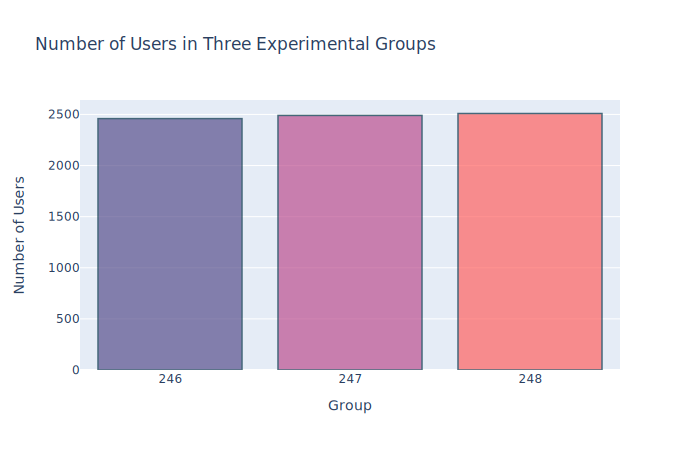

In [39]:
three_groups_graph = go.Figure(go.Bar(x=three_groups.group, y=three_groups.n_users, opacity=0.7,
                                     marker_line_color='#002f45', marker_line_width=1.5,
                                     marker_color=['#58508d', '#bc5090', '#ff6361']))
three_groups_graph.update_layout(title='Number of Users in Three Experimental Groups',
                                xaxis_title='Group',
                                yaxis_title='Number of Users')
three_groups_graph.update_xaxes(nticks=4)
three_groups_graph.show('svg')

We've learned that we still have users from all three experimental groups, and the sizes of these groups are almost equal.

[Back to Contents](#cont)

### <a id='step3concl'>Conclusions to Step 3</a>

We've studied our data thoroughly and learned that in fact it covers a shorter period of time: only a week of 1-8 August 2019. After subsetting the dataframe and getting rid of the old data we've evaluated our losses.

Turns out, we've lost only 2,684 events (1.28% of the dataset) and 13 users (0.01% of the dataset).

[Back to Contents](#cont)

## <a id='step4'>Step 4. Studying the Event Funnel</a>

Here is what we are going to do during this step:

- See what events are in the logs and their frequency of occurrence.
- Find the number of users who performed each of these actions. Calculate the proportion of users who performed the action at least once.
- Figure out in what order the actions took place.
- Use the event funnel to find the share of users that proceed from each stage to the next.
- Find out at what stage we lose most users.
- Calculate the share of users that make the entire journey from their first event to payment.

### <a id='step4events'>What Events Are in the Logs? What Is their Frequency of Occurrence?</a>

In [46]:
frequency = (data_final.groupby('event_name')
    .agg({'user_id':'count'})
    .sort_values(by='user_id', ascending=False)) / len(data_final)
frequency.columns=['share_of_all_events']
frequency.reset_index(inplace=True)
frequency.style.format({'share_of_all_events':'{:.2%}'})

,event_name,share_of_all_events
0,MainScreenAppear,54.54%
1,OffersScreenAppear,19.70%
2,CartScreenAppear,14.34%
3,PaymentScreenSuccessful,10.94%
4,Tutorial,0.47%


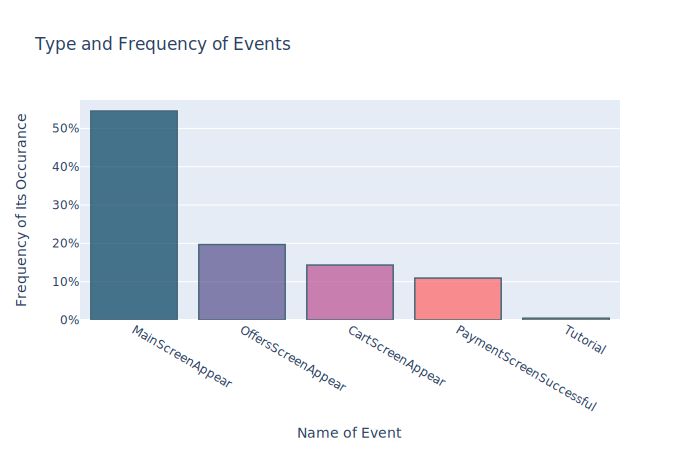

In [49]:
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']
frequency_graph = go.Figure()
frequency_graph.add_trace(go.Bar(x=frequency.event_name, y=frequency.share_of_all_events, marker_color=colors,
                             opacity=0.7, marker_line_color='#002f45',
                              marker_line_width=1.5))
frequency_graph.update_layout(title='Type and Frequency of Events',
                          xaxis_title='Name of Event',
                          yaxis_title='Frequency of Its Occurance',
                             yaxis_tickformat='.0%')
frequency_graph.show('svg')

On this graph, we've sorted the events by their frequency of occurrence.

The most common event is MainScreenAppear: it appeared in 54.6% of our dataset. The least common is Tutorial: it adds up only to 0.5% of the dataset.

[Back to Contents](#cont)

### <a id='step4users'>How Many Users Performed Each of These Actions?</a>

In [60]:
# Calculating share of users who performed each action

proportion_of_users = (data_final.groupby('event_name')
    .agg({'user_id':'nunique'})
    .reset_index()
    .sort_values(by='user_id', ascending=False))
proportion_of_users.columns = ['event_name', 'n_users']
proportion_of_users['proportion'] = proportion_of_users.n_users / data_final.user_id.nunique()
proportion_of_users.style.format({'proportion':'{:.2%}'})

,event_name,n_users,proportion
1,MainScreenAppear,7344,98.47%
2,OffersScreenAppear,4517,60.57%
0,CartScreenAppear,3658,49.05%
3,PaymentScreenSuccessful,3464,46.45%
4,Tutorial,824,11.05%


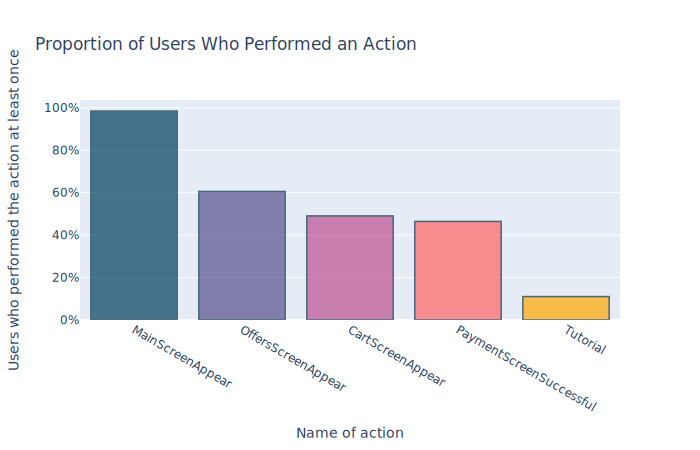

In [54]:
proportion_of_users_graph = go.Figure()
proportion_of_users_graph.add_trace(go.Bar(x=proportion_of_users.event_name, y=proportion_of_users.proportion,
                                           hovertext=proportion_of_users.n_users,
                                           marker_color=colors,
                             opacity=0.7, marker_line_color='#002f45',
                              marker_line_width=1.5))
proportion_of_users_graph.update_layout(title='Proportion of Users Who Performed an Action',
                          xaxis_title='Name of action',
                          yaxis_title='Users who performed the action at least once',
                                       yaxis_tickformat='.0%')
proportion_of_users_graph.show('svg')

As we've learned, 98.47% of our unique users had MainScreenAppear, 60.59% got to see the offers, 49% proceeded to the cart, 46.44% made the payment.

Only 11% watched the tutorial.

[Back to Contents](#cont)

In [61]:
# Calculating number of users per action

at_least_once = (data_final
                 .groupby(['user_id', 'event_name'])['event_ts']
                 .count()
                 .reset_index())
at_least_once.head()

,user_id,event_name,event_ts
0,6888746892508752,MainScreenAppear,1
1,6909561520679493,CartScreenAppear,1
2,6909561520679493,MainScreenAppear,2
3,6909561520679493,OffersScreenAppear,1
4,6909561520679493,PaymentScreenSuccessful,1


In [62]:
# Calculating number of users with repeated actions

repeated = (at_least_once[at_least_once.event_ts != 1]
            .groupby('event_name')['user_id']
            .nunique()
            .sort_values(ascending=False)
            .reset_index())
repeated.columns = ['event_name', 'n_repeated_users']
repeated.head()

,event_name,n_repeated_users
0,MainScreenAppear,7099
1,OffersScreenAppear,3837
2,CartScreenAppear,3186
3,PaymentScreenSuccessful,2890
4,Tutorial,81


In [63]:
# Calculating share of these users

repeated = repeated.merge(proportion_of_users[['event_name', 'n_users']], on='event_name', how='left')
repeated['share'] = repeated.n_repeated_users / repeated.n_users
repeated.style.format({'share':'{:.2%}'})

,event_name,n_repeated_users,n_users,share
0,MainScreenAppear,7099,7344,96.66%
1,OffersScreenAppear,3837,4517,84.95%
2,CartScreenAppear,3186,3658,87.10%
3,PaymentScreenSuccessful,2890,3464,83.43%
4,Tutorial,81,824,9.83%


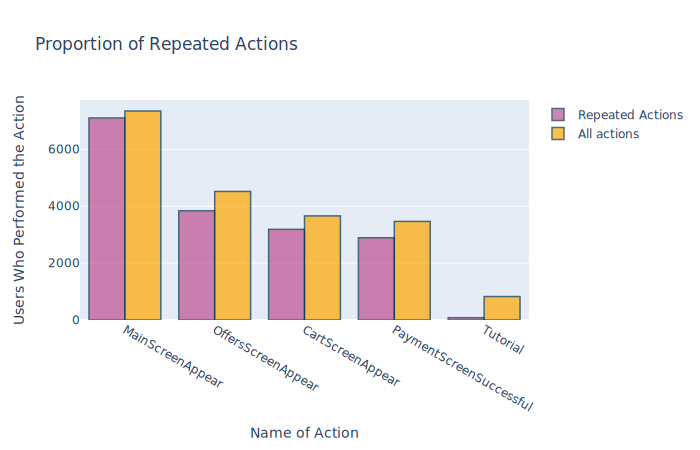

In [64]:
repeated_customers_graph = go.Figure()
repeated_customers_graph.add_trace(go.Bar(x=repeated.event_name, y=repeated.n_repeated_users,
                                           name='Repeated Actions',
                                          hovertext=repeated.share,
                                           marker_color='#bc5090',
                             opacity=0.7, marker_line_color='#002f45',
                              marker_line_width=1.5))
repeated_customers_graph.add_trace(go.Bar(x=repeated.event_name, y=repeated.n_users,
                                           name='All actions',
                                           marker_color='#ffa600',
                             opacity=0.7, marker_line_color='#002f45',
                              marker_line_width=1.5))
repeated_customers_graph.update_layout(barmode='group',
                                       title='Proportion of Repeated Actions',
                          xaxis_title='Name of Action',
                          yaxis_title='Users Who Performed the Action')
repeated_customers_graph.show('svg')

We've learned that the share of users who repeat each action is generally rather big. Out of all users who've seen the offers, 85% returned to that page again. Out of all the users who've seen the cart screen, 87% users did it more than once. Again, among the users who made a purchase, 84% have seen the payment sucessful screen more than once.


The one exception is a tutorial: only 10% users returned to read it again.

[Back to Contents](#cont)

### <a id='step4order'>In What Order Did the Actions Take Place?</a>

The most consistent order to imagine is the following:
- first, MainScreenAppear;
- then, OffersScreenAppear;
- after that, CartScreenAppear;
- and finally, PaymentScreenSuccessful.

Tutorial is an optional step and definitely not the part of the event funnel. Knowing that, we will omit data on tutorial when building the event funnel.

In [65]:
data_final = data_final[data_final.event_name != 'Tutorial']
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206069 entries, 2829 to 244125
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  206069 non-null  object        
 1   user_id     206069 non-null  int64         
 2   event_ts    206069 non-null  datetime64[ns]
 3   group       206069 non-null  int64         
 4   date        206069 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 9.4+ MB


However, we know that this is not always the case. Some stores have an option 'Buy in one click', which leads their users from the main screen directly to the payment, skipping the offer screen and the cart.

Another known fact is that information on payments and website wisits is often stored in different datasets and gets different timestamps. After this datasets are merged, sometimes even for legit users it might seem that they've seen payment screen before visiting the cart. Here is one example of such a user in our dataset:

In [66]:
data_final[data_final.user_id == 6922444491712477]

,event_name,user_id,event_ts,group,date
127670,MainScreenAppear,6922444491712477,2019-08-04 14:19:33,246,2019-08-04
127672,PaymentScreenSuccessful,6922444491712477,2019-08-04 14:19:40,246,2019-08-04
127673,CartScreenAppear,6922444491712477,2019-08-04 14:19:40,246,2019-08-04
127674,MainScreenAppear,6922444491712477,2019-08-04 14:19:40,246,2019-08-04
127675,OffersScreenAppear,6922444491712477,2019-08-04 14:19:46,246,2019-08-04
134267,MainScreenAppear,6922444491712477,2019-08-04 17:16:28,246,2019-08-04
134273,PaymentScreenSuccessful,6922444491712477,2019-08-04 17:16:32,246,2019-08-04
134274,MainScreenAppear,6922444491712477,2019-08-04 17:16:33,246,2019-08-04
134275,CartScreenAppear,6922444491712477,2019-08-04 17:16:33,246,2019-08-04
134281,OffersScreenAppear,6922444491712477,2019-08-04 17:16:44,246,2019-08-04


[Back to Contents](#cont)

### <a id='step4share'>What Is the Share of Users That Proceed from Each Stage to the Next?</a>

In [71]:
funnel = (data_final
          .groupby('event_name')['user_id']
          .nunique()
          .sort_values(ascending=False)
          .reset_index())
funnel.columns = ['event_name', 'n_users']
funnel['share_of_previous_users'] = round(funnel.n_users.pct_change(), 2)
funnel.fillna(0, inplace=True)
funnel.style.format({'share_of_previous_users':'{:.0%}'})

,event_name,n_users,share_of_previous_users
0,MainScreenAppear,7344,0%
1,OffersScreenAppear,4517,-38%
2,CartScreenAppear,3658,-19%
3,PaymentScreenSuccessful,3464,-5%


As we see, the biggest number of users (38%) was lost when proceeding from main screen (the first stage of the funnel) to offers screen (the second stage). Apparently, this is a pivotal moment, when most users decide if they will buy the product or not.

If they decided to buy, they'll most likely proceed to the further stages. In general, the more stages they've completed, the more likely they are to finish the purchase: only 5% of the users left the cart before seeing the payment screen.

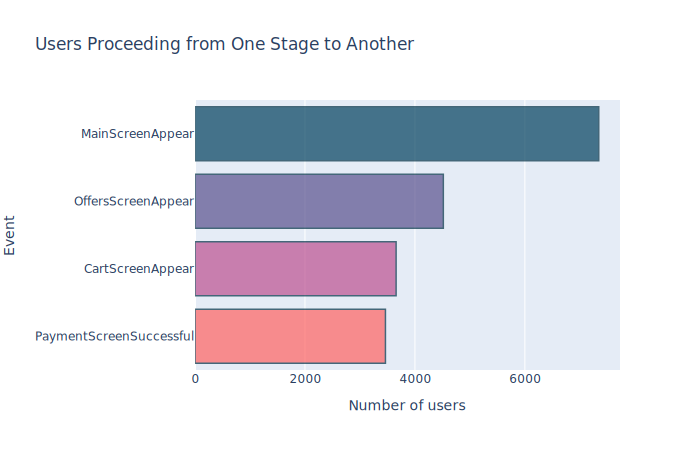

In [72]:
stages_graph = go.Figure(go.Bar(y=funnel.event_name, x=funnel.n_users,
                                hovertext=funnel.share_of_previous_users,
                                orientation='h',
                               marker_color=colors, opacity=0.7,
                                marker_line_color='#002f45', marker_line_width=1.5))
stages_graph.update_layout(title='Users Proceeding from One Stage to Another',
                           yaxis={'categoryorder':'total ascending'},
                           xaxis_title='Number of users',
                           yaxis_title='Event')

stages_graph.show('svg')

[Back to Contents](#cont)

### <a id='step4entirejourney'>What Share of Users Made the Entire Journey from Their First Event to Payment?</a>

In [74]:
all_the_way = (data_final
               .groupby('user_id')['event_name'].nunique()
               .reset_index()
               .groupby('event_name')['user_id'].nunique()
              .reset_index())
all_the_way.columns = ['n_stages', 'n_users']
all_the_way['share_of_users'] = all_the_way.n_users / data_final.user_id.nunique()
all_the_way.style.format({'share_of_users':'{:.0%}'})

,n_stages,n_users,share_of_users
0,1,2894,39%
1,2,946,13%
2,3,259,3%
3,4,3355,45%


We can add that only 45% of users went through four different stages of our event funnel.

The others either didn't convert or used a shortcut ('Buy in one click', links to the product in marketing emails etc.). Here is how a "proper" event funnel looks like.

In [76]:
funnel_by_group = (data_final
                   .pivot_table(index='event_name', columns='group', values='user_id', aggfunc='nunique')
                   .reset_index())
funnel_by_group = funnel_by_group.melt(id_vars=['event_name'], value_vars=[246, 247, 248])
funnel_by_group.columns = ['event_name', 'group', 'n_users']
funnel_by_group = funnel_by_group.sort_values(by=['group', 'n_users'], ascending=False)
funnel_by_group

,event_name,group,n_users
9,MainScreenAppear,248,2465
10,OffersScreenAppear,248,1503
8,CartScreenAppear,248,1202
11,PaymentScreenSuccessful,248,1154
5,MainScreenAppear,247,2453
6,OffersScreenAppear,247,1497
4,CartScreenAppear,247,1215
7,PaymentScreenSuccessful,247,1135
1,MainScreenAppear,246,2426
2,OffersScreenAppear,246,1517


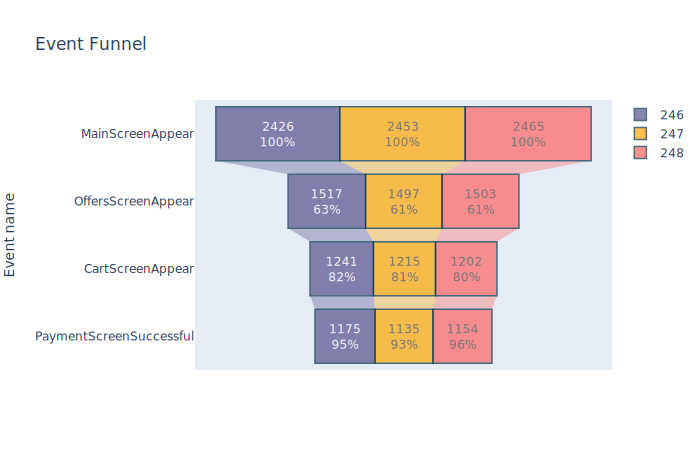

In [78]:
funnel_graph = go.Figure()
funnel_graph.add_trace(go.Funnel(name='246', 
                                 y=funnel_by_group.event_name,
                                 x=funnel_by_group[funnel_by_group.group==246].n_users,
                                 textinfo = 'value+percent previous',
                                 marker_color='#58508d',
                                 opacity=0.7, marker_line_color='#002f45',
                                 marker_line_width=1.5))
funnel_graph.add_trace(go.Funnel(name='247', 
                                 y=funnel_by_group.event_name,
                                 x=funnel_by_group[funnel_by_group.group==247].n_users,
                                 textinfo = 'value+percent previous',
                                 marker_color='#ffa600',
                                 opacity=0.7, marker_line_color='#002f45',
                                 marker_line_width=1.5))
funnel_graph.add_trace(go.Funnel(name='248', 
                                 y=funnel_by_group.event_name,
                                 x=funnel_by_group[funnel_by_group.group==248].n_users,
                                 textinfo = 'value+percent previous',
                                 marker_color='#ff6361',
                                 opacity=0.7, marker_line_color='#002f45',
                                 marker_line_width=1.5))
funnel_graph.update_layout(title='Event Funnel',
                           xaxis_title='Number of users',
                           yaxis_title='Event name')
funnel_graph.show('svg')

This graph depicts an ideal event funnel for our online store. The biggest loss is experienced on the second stage (moving from the main screen to the offers). After this, the loss of users is minimal: most users that decided to go on and see the offer ended up making a purchase.

However, we remember that in reality not all the visitors perform actions in this desired order. Perhaps, it would be useful to have a look at the variety of different ways which lead to purchasing the product.

In [79]:
# This function checks the sequence or user's first events
def event_sequence(user):
    sorted_user = data_final[data_final.user_id == user].sort_values(by=['user_id', 'event_ts'])
    return sorted_user['event_name'].drop_duplicates(keep='first').to_list()

event_sequence(6922444491712477)

['MainScreenAppear',
 'PaymentScreenSuccessful',
 'CartScreenAppear',
 'OffersScreenAppear']

In [80]:
right_sequence = []

for user in data_final.user_id.unique():
    sequence = event_sequence(user)
    if sequence == ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']:
        right_sequence.append(user)
        
print(len(right_sequence))

878


In [81]:
print('Only {:} users ({:.2%} of all) performed all the actions in the "right" order.'.format(len(right_sequence), len(right_sequence)/data.user_id.nunique()))

Only 878 users (11.75% of all) performed all the actions in the "right" order.


As we see, there is definitely not a single route, but a road with a lot of variations, which could be caused by many reasons, including:

- existing shortcuts ('Buy in one click' buttons);
- marketing emails with links to some specific offers;
- flaws in documenting user journeys on the website etc.

[Back to Contents](#cont)

### <a id='step4concl'>Conclusions to Step 4</a>

We've studied the event funnel and come up with several conclusions:

- the biggest part of visitors is lost during one step: moving from the main screen to the offers screen;
- the more actions have the visitors already made, the higher is the probability that they'll execute the purchase;
- though there is one consistential route for visitors on the website, in reality our logs store information about many other routes. It is partially due to shortcuts, partially to flaws in documenting user journeys. 

[Back to Contents](#cont)

## <a id='step5'>Step 5. Studying the Results of the Experiment</a>

Finally, we are ready to assess the results of A/A/B testing and review the following questions:

- How many users are there in each group?
- Is there a statistically significant difference between samples 246 and 247 (based on one most popular event)? Can we confirm that the groups were split properly?
- Is there statistically significant difference between control groups and the group with altered fonts? What conclusions can we draw from the experiment?
- What significance level have we set to test the statistical hypotheses mentioned above? (...) What should the significance level be?

### <a id='step5users'>How Many Users are There in Each Group?</a>

In [111]:
data_final.groupby('group')['user_id'].nunique()

group
246    2458
247    2489
248    2507
Name: user_id, dtype: int64

The difference in the number of users between three groups is minimal. As we've [already checked](#step2users), each of them appears in one group only.

[Back to Contents](#cont)

### <a id='step5aa'>Is There a Statistically Significant Difference Between Samples 246 and 247 (groups A and A)?</a>

In order to check if there is statistically significant difference between groups A and A (246 and 247), we are going to compare their conversion (ratio of payment screen appearance to the number of users in this group).

**Null hypothesis:** conversion of sample 246 is similar to sample 247

**Alternative hypothesis:** conversion of sample 246 differs from sample 247

**Alpha:** 5% (we'll start with the most common level).

In [112]:
pivot = (data_final
    .pivot_table(index='event_name', columns='group', values='user_id', aggfunc='nunique')
    .reset_index())
pivot

group,event_name,246,247,248
0,CartScreenAppear,1241,1215,1202
1,MainScreenAppear,2426,2453,2465
2,OffersScreenAppear,1517,1497,1503
3,PaymentScreenSuccessful,1175,1135,1154


In [113]:
# Function for checking our hypotheses with the test of proportions

def check_hypothesis(group1, group2, event, alpha=0.05):
    # calculating the number of successes for each group
    successes1 = pivot[pivot.event_name == event][group1].iloc[0]
    successes2 = pivot[pivot.event_name == event][group2].iloc[0]
    
    # the number of trials for each group
    trials1 = data_final[data_final.group == group1]['user_id'].nunique()
    trials2 = data_final[data_final.group == group2]['user_id'].nunique()
    
    # proportion of successes in both groups
    p1 = successes1 / trials1
    p2 = successes2 / trials2

    # proportion in a combined dataset
    p_combined = (successes1 + successes2) / (trials1 + trials2)

    difference = p1 - p2
    
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    distr = st.norm(0, 1) 

    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print("Event: '{}'".format(event))
    print('p-value: ', p_value) 

    if (p_value < alpha):
        print("Null hupothesis rejected for the event '{}' in groups {} and {}.".format(event, group1, group2))
    else:
        print("Failed to reject the null hypothesis for the event '{}' in groups {} and {}.".format(event, group1, group2))
    print('')

In [114]:
check_hypothesis(246, 247, 'PaymentScreenSuccessful', alpha=0.05)

Event: 'PaymentScreenSuccessful'
p-value:  0.12055326296293334
Failed to reject the null hypothesis for the event 'PaymentScreenSuccessful' in groups 246 and 247.



In this test of proportions, we've failed to reject the null hypothesis, meaning that there is no statistically significant difference in conversion rate in samples 246 and 247.

This is good news for us: our control groups in A/A/B testing are similar to each other, the test is performing fine. We're going to use the same function in order to check all events for groups 246 and 247.

In [117]:
for i in pivot.event_name.unique():
    check_hypothesis(246, 247, i, alpha=0.05)

Event: 'CartScreenAppear'
p-value:  0.239194486237011
Failed to reject the null hypothesis for the event 'CartScreenAppear' in groups 246 and 247.

Event: 'MainScreenAppear'
p-value:  0.6625354406346942
Failed to reject the null hypothesis for the event 'MainScreenAppear' in groups 246 and 247.

Event: 'OffersScreenAppear'
p-value:  0.2571414151005711
Failed to reject the null hypothesis for the event 'OffersScreenAppear' in groups 246 and 247.

Event: 'PaymentScreenSuccessful'
p-value:  0.12055326296293334
Failed to reject the null hypothesis for the event 'PaymentScreenSuccessful' in groups 246 and 247.



Apparently, groups 246 and 247 don't have statistically significant difference in any of the events. We can conclude that they were split properly.

[Back to Contents](#cont)

### <a id='step5ab'>Is There Statistically Significant Difference Between Control Groups and the Group with Altered Fonts?</a>

In [118]:
# Comparing groups 246 and 248 (A and B)

for i in pivot.event_name.unique():
    check_hypothesis(246, 248, i, alpha=0.05)

Event: 'CartScreenAppear'
p-value:  0.07319388421087125
Failed to reject the null hypothesis for the event 'CartScreenAppear' in groups 246 and 248.

Event: 'MainScreenAppear'
p-value:  0.2775881124885262
Failed to reject the null hypothesis for the event 'MainScreenAppear' in groups 246 and 248.

Event: 'OffersScreenAppear'
p-value:  0.20280054023210692
Failed to reject the null hypothesis for the event 'OffersScreenAppear' in groups 246 and 248.

Event: 'PaymentScreenSuccessful'
p-value:  0.2109643652975286
Failed to reject the null hypothesis for the event 'PaymentScreenSuccessful' in groups 246 and 248.



In [119]:
# Comparing groups 247 and 248 (A and B)

for i in pivot.event_name.unique():
    check_hypothesis(247, 248, i, alpha=0.05)

Event: 'CartScreenAppear'
p-value:  0.5388370252288306
Failed to reject the null hypothesis for the event 'CartScreenAppear' in groups 247 and 248.

Event: 'MainScreenAppear'
p-value:  0.5139719240861464
Failed to reject the null hypothesis for the event 'MainScreenAppear' in groups 247 and 248.

Event: 'OffersScreenAppear'
p-value:  0.8895307425954271
Failed to reject the null hypothesis for the event 'OffersScreenAppear' in groups 247 and 248.

Event: 'PaymentScreenSuccessful'
p-value:  0.7601109346336783
Failed to reject the null hypothesis for the event 'PaymentScreenSuccessful' in groups 247 and 248.



In [120]:
# Calculating combined results for the control groups

pivot['combined'] = pivot[246]+pivot[247]
pivot.head()

group,event_name,246,247,248,combined
0,CartScreenAppear,1241,1215,1202,2456
1,MainScreenAppear,2426,2453,2465,4879
2,OffersScreenAppear,1517,1497,1503,3014
3,PaymentScreenSuccessful,1175,1135,1154,2310


In [121]:
trials_combined = data_final[data_final.group == 246]['user_id'].nunique() + data_final[data_final.group == 247]['user_id'].nunique()
trials_combined

4947

In [122]:
def check_combined(event, alpha=0.05):
    # calculating the number of successes for each group
    successes1 = pivot[pivot.event_name == event]['combined'].iloc[0]
    successes2 = pivot[pivot.event_name == event][248].iloc[0]

    # the number of trials for each group
    trials1 = trials_combined
    trials2 = data_final[data_final.group == 248]['user_id'].nunique()

    # proportion of successes in both groups
    p1 = successes1 / trials1
    p2 = successes2 / trials2

    # proportion in a combined dataset
    p_combined = (successes1 + successes2) / (trials1 + trials2)

    difference = p1 - p2

    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    distr = st.norm(0, 1) 

    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print("Event: '{}'".format(event))
    print('p-value: ', p_value) 

    if (p_value < alpha):
        print("Null hupothesis rejected for the event '{}' in combined A+A groups and group B.".format(event))
    else:
        print("Failed to reject the null hypothesis for the event '{}' in combined A+A groups and group B.".format(event))
    print('')
    
# Comparing combined results and group 248 (A+A and B)
for i in pivot.event_name.unique():
    check_combined(i, alpha=0.05)

Event: 'CartScreenAppear'
p-value:  0.16528829092136843
Failed to reject the null hypothesis for the event 'CartScreenAppear' in combined A+A groups and group B.

Event: 'MainScreenAppear'
p-value:  0.3089880163640899
Failed to reject the null hypothesis for the event 'MainScreenAppear' in combined A+A groups and group B.

Event: 'OffersScreenAppear'
p-value:  0.416334695484635
Failed to reject the null hypothesis for the event 'OffersScreenAppear' in combined A+A groups and group B.

Event: 'PaymentScreenSuccessful'
p-value:  0.5871814354419509
Failed to reject the null hypothesis for the event 'PaymentScreenSuccessful' in combined A+A groups and group B.



We've compared the results of combined A + A group (246 + 247) to the B group (248) and found out that, despite being twice smaller in size, group B also hasn't reached statistically significant difference from the combined group A+A.

[Back to Contents](#cont)

### <a id='step5alpha'>What Should the Significance Level Be?</a>

Throughout all the tests we've set the **statistical significance level (alpha) to 5%**, as it is a commonly used value and we didn't have any specific reason to change it.

However, this level remains valid only for a single experiment. In order to decrease the probability of concluding that the effect was real by mistake (type I error), when we run multiple experiments, in theory we should adjust alpha with the **Bonferroni correction** and divide alpha by the number of experiments (m).

In [123]:
alpha_corrected = 0.05 / 16
print('Alpha (after the Bonferroni correction): {}'.format(alpha_corrected))

Alpha (after the Bonferroni correction): 0.003125


Now let's rerun our tests with the adjusted statistical significance level and see if enything has changed.

In [124]:
# Comparing A and A groups (246 and 247)

for i in pivot.event_name.unique():
    check_hypothesis(246, 247, i, alpha=alpha_corrected)

Event: 'CartScreenAppear'
p-value:  0.239194486237011
Failed to reject the null hypothesis for the event 'CartScreenAppear' in groups 246 and 247.

Event: 'MainScreenAppear'
p-value:  0.6625354406346942
Failed to reject the null hypothesis for the event 'MainScreenAppear' in groups 246 and 247.

Event: 'OffersScreenAppear'
p-value:  0.2571414151005711
Failed to reject the null hypothesis for the event 'OffersScreenAppear' in groups 246 and 247.

Event: 'PaymentScreenSuccessful'
p-value:  0.12055326296293334
Failed to reject the null hypothesis for the event 'PaymentScreenSuccessful' in groups 246 and 247.



In [125]:
# Comparing groups 246 and 248 (A and B)

for i in pivot.event_name.unique():
    check_hypothesis(246, 248, i, alpha=alpha_corrected)

Event: 'CartScreenAppear'
p-value:  0.07319388421087125
Failed to reject the null hypothesis for the event 'CartScreenAppear' in groups 246 and 248.

Event: 'MainScreenAppear'
p-value:  0.2775881124885262
Failed to reject the null hypothesis for the event 'MainScreenAppear' in groups 246 and 248.

Event: 'OffersScreenAppear'
p-value:  0.20280054023210692
Failed to reject the null hypothesis for the event 'OffersScreenAppear' in groups 246 and 248.

Event: 'PaymentScreenSuccessful'
p-value:  0.2109643652975286
Failed to reject the null hypothesis for the event 'PaymentScreenSuccessful' in groups 246 and 248.



In [126]:
# Comparing groups 247 and 248 (A and B)

for i in pivot.event_name.unique():
    check_hypothesis(247, 248, i, alpha=alpha_corrected)

Event: 'CartScreenAppear'
p-value:  0.5388370252288306
Failed to reject the null hypothesis for the event 'CartScreenAppear' in groups 247 and 248.

Event: 'MainScreenAppear'
p-value:  0.5139719240861464
Failed to reject the null hypothesis for the event 'MainScreenAppear' in groups 247 and 248.

Event: 'OffersScreenAppear'
p-value:  0.8895307425954271
Failed to reject the null hypothesis for the event 'OffersScreenAppear' in groups 247 and 248.

Event: 'PaymentScreenSuccessful'
p-value:  0.7601109346336783
Failed to reject the null hypothesis for the event 'PaymentScreenSuccessful' in groups 247 and 248.



In [127]:
# Comparing combined results and group 248 (A+A and B)

for i in pivot.event_name.unique():
    check_combined(i, alpha=alpha_corrected)

Event: 'CartScreenAppear'
p-value:  0.16528829092136843
Failed to reject the null hypothesis for the event 'CartScreenAppear' in combined A+A groups and group B.

Event: 'MainScreenAppear'
p-value:  0.3089880163640899
Failed to reject the null hypothesis for the event 'MainScreenAppear' in combined A+A groups and group B.

Event: 'OffersScreenAppear'
p-value:  0.416334695484635
Failed to reject the null hypothesis for the event 'OffersScreenAppear' in combined A+A groups and group B.

Event: 'PaymentScreenSuccessful'
p-value:  0.5871814354419509
Failed to reject the null hypothesis for the event 'PaymentScreenSuccessful' in combined A+A groups and group B.



So, despite running all the tests again with a different statistical significance level, we've gotten the same result.

Honestly, this doesn't seem surprising: we haven't reached statistically significant difference in any of our groups, meaning that there was literally no room for type I error.

[Back to Contents](#cont)

### <a id='step5concl'>Conclusions to Step 5</a>

We've studied the results of our A/A/B testing and confirmed that the splitting went well. However, we learned that we haven't reached statistically significant difference between samples A and B.

[Back to Contents](#cont)

## <a id='genconcl'>General Conclusions</a>

Overall, we've learned that our dataset contains information on 7,462 users of the online food store. They are split into three almost equal test groups:

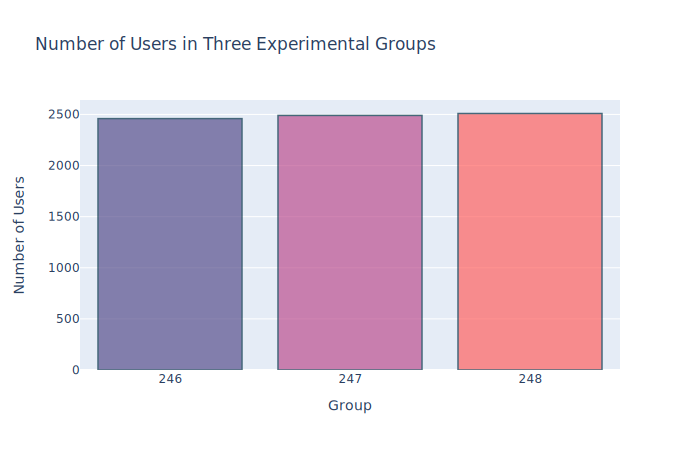

In [128]:
three_groups_graph.show('svg')

Samples 246 and 247 are both control groups, whereas sample 248 is a test group, which was shown the website with altered fonts.

Our logs contain information on five possible types of events, our of which main screen appearance is the most frequent (viewed by 98.5% of all users) and tutorial is the least popular (viewed by 11% users).

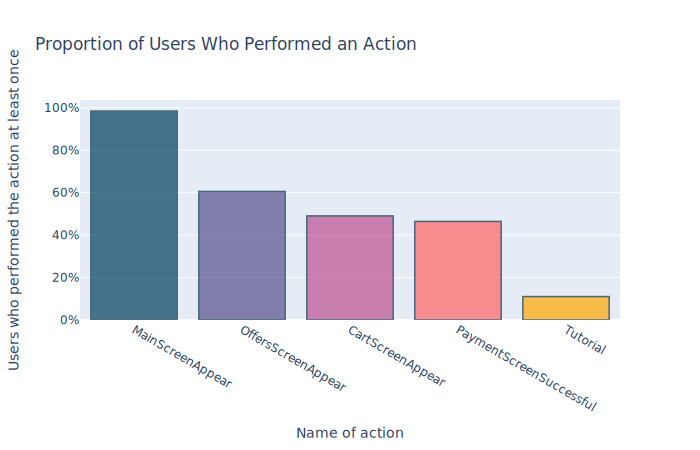

In [129]:
proportion_of_users_graph.show('svg')

### After studying the logs and results of A/A/B testing, we've reached several conclusions.

1. Unfortunately, the testing **hasn't reached statistical significance yet**. Probably, it's just a matter of time: we've learned that the test has been running only for a week (1-8 August).

2. We've created and studied the event funnel. Turns out, the biggest part of visitors is lost during one step: moving from the main screen to the offers screen: only 61-63% of those who've seen the main screen proceeded to the offers screen.

However, **the deeper our users get involved in the process, the more likely they are to finish the purchase**. For example, out of all the users who've seen the offets screen, 80-82% proceeded to the cart, and out of them, 93-96% completed the payment.

We can also add, that in terms of conversion the situation looks good: in all three groups the ratio of purchases per main screen visits has reached 46.2-48.4%, which is a pretty favorable result.

So our main recommendation is to **continue the test and assess its results later**, after the statistical significance is reached.

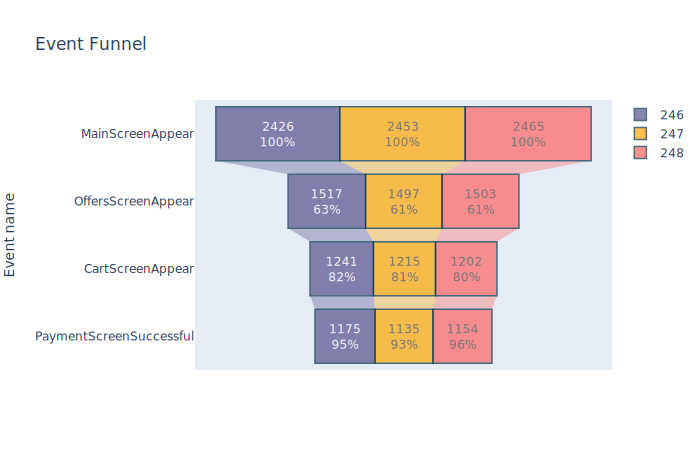

In [130]:
funnel_graph.show('svg')

[Back to Contents](#cont)